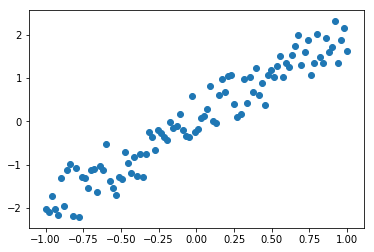

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

w =  2.11545


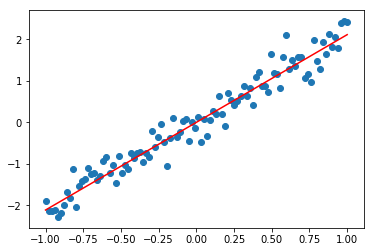

In [17]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    return tf.multiply(X, w)

w = tf.Variable(0., name = "weights")

y_model = model(X, w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict = {X:x, Y:y})
    w_val = sess.run(w) 

print("w = ", w_val)    
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()    

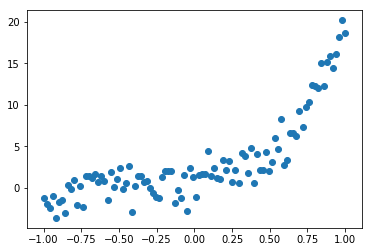

w =  [ 0.91462052  2.25355721  5.17771769  4.67395306  2.70432448  4.53194666]


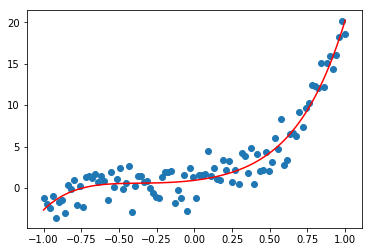

In [26]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 100

trX = np.linspace(-1, 1, 100)

trY_coeffs = [1, 2, 3, 4, 5, 6] 
num_coeffs = len(trY_coeffs)
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
    
trY += np.random.randn(*trX.shape) * 1.5

plt.scatter(trX, trY)
plt.show()   


X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name = "parameters")

y_model = model(X, w)
cost = tf.pow(Y - y_model, 2)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(trX, trY):
            sess.run(train_op, feed_dict = {X:x, Y:y})
    w_val = sess.run(w) 

print("w = ", w_val)  

trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
    
plt.scatter(trX, trY)    
plt.plot(trX, trY2, 'r')
plt.show()


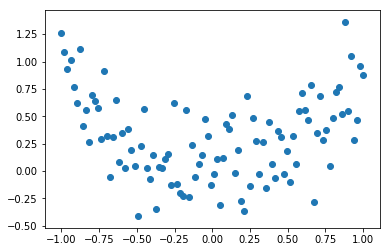

w =  [ 0.0744281   0.07105007  0.44950777 -0.0686869   0.42908233 -0.09867951]
cost =  7.56131


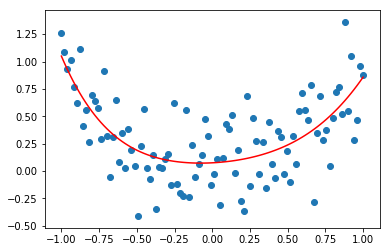

In [54]:
import tensorflow as tf

learning_rate = 0.001
training_epochs = 100
reg_lambda = 0.02

trX = np.linspace(-1, 1, 100)

#trY_coeffs = [1, 2, 3, 4, 5, 6] 
trY_coeffs = [0, 0, 1, 0, 0, 0] 
num_coeffs = len(trY_coeffs)
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
    
trY += np.random.randn(*trX.shape) * 0.3

plt.scatter(trX, trY)
plt.show()   


X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name = "parameters")

y_model = model(X, w)
cost = tf.math.divide(tf.add(
    tf.reduce_sum(tf.square(Y - y_model)),
    tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))
    ), 1.) #2. * trX.size)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict = {X:trX, Y:trY})
    w_val, final_cost = sess.run([w, cost],feed_dict = {X:trX, Y:trY}) 

print("w = ", w_val)  
print("cost = ", final_cost)  

trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
    
plt.scatter(trX, trY)    
plt.plot(trX, trY2, 'r')
plt.show()